In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline
# %config InlineBackend.figure_format = 'svg'

In [2]:

df = pd.read_csv('Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe() # only describe the continuous variables

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
undersample_category = 'No'
num_samples_to_keep = 1750
df_majority = df[df.Churn==undersample_category]
df_minority = df[df.Churn!=undersample_category]

# Undersample without replacement
df_majority_downsampled = df_majority.sample(num_samples_to_keep)

# Combine minority category with downsampled majority dataframe
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

df=df_downsampled


In [7]:
for col in df.select_dtypes([np.object]).columns:
    print('{}: {}\n'.format(col, df[col].unique()))

customerID: ['2790-XUYMV' '4367-NUYAO' '7130-CTCUS' ... '6894-LFHLY' '0639-TSIQW'
 '8361-LTMKD']

gender: ['Male' 'Female']

Partner: ['No' 'Yes']

Dependents: ['Yes' 'No']

PhoneService: ['Yes' 'No']

MultipleLines: ['Yes' 'No' 'No phone service']

InternetService: ['Fiber optic' 'No' 'DSL']

OnlineSecurity: ['Yes' 'No internet service' 'No']

OnlineBackup: ['Yes' 'No internet service' 'No']

DeviceProtection: ['No' 'No internet service' 'Yes']

TechSupport: ['No' 'No internet service' 'Yes']

StreamingTV: ['No' 'No internet service' 'Yes']

StreamingMovies: ['No' 'No internet service' 'Yes']

Contract: ['One year' 'Two year' 'Month-to-month']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Credit card (automatic)' 'Mailed check' 'Bank transfer (automatic)'
 'Electronic check']

TotalCharges: ['6028.95' ' ' '825.1' ... '75.75' '6886.25' '306.6']

Churn: ['No' 'Yes']



C:\Users\xwwwa\AppData\Local\Temp\ipykernel_11224\1066985337.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  for col in df.select_dtypes([np.object]).columns:


In [8]:
df.gender.replace({
    'Female': '2',
    'Male': '1',
}, inplace=True)
df.Partner.replace({
    'Yes':'1',
    'No':'0',
},inplace=True)
df.Dependents.replace({
    'Yes':'1',
    'No':'0',
},inplace=True)
df.PhoneService.replace({
    'Yes':'1',
    'No':'0',
},inplace=True)
df.MultipleLines.replace({
    'Yes':'1',
    'No':'0',
    'No phone service':'0',
},inplace=True)
df.InternetService.replace({
    'DSL':'1',
    'Fiber optic':'2',
    'No':'0',
},inplace=True)
df.OnlineSecurity.replace({
    'Yes':'1',
    'No internet service':'0',
    'No':'0',
},inplace=True)
df.OnlineBackup.replace({
    'Yes':'1',
    'No internet service':'0',
    'No':'0',
},inplace=True)
df.DeviceProtection.replace({
    'Yes':'1',
    'No internet service':'0',
    'No':'0',
},inplace=True)
df.TechSupport.replace({
    'Yes':'1',
    'No internet service':'0',
    'No':'0',
},inplace=True)
df.StreamingTV.replace({
    'Yes':'1',
    'No internet service':'0',
    'No':'0',
},inplace=True)
df.StreamingMovies.replace({
    'Yes':'1',
    'No internet service':'0',
    'No':'0',
},inplace=True)
df.Contract.replace({
    'Month-to-month':'1',
    'One year':'2',
    'Two year':'3',
},inplace=True)
df.PaperlessBilling.replace({
    'Yes':'1',
    'No':'0',
},inplace=True)
df.PaymentMethod.replace({
    'Electronic check':'1',
    'Mailed check':'2',
    'Bank transfer (automatic)':'3',
    'Credit card (automatic)':'4',
},inplace=True)
df.Churn.replace({
    'No':'0',
    'Yes':'1',
},inplace=True)

In [9]:
for col in df.select_dtypes([np.object]).columns:
    print('{}: {}\n'.format(col, df[col].unique()))

customerID: ['2790-XUYMV' '4367-NUYAO' '7130-CTCUS' ... '6894-LFHLY' '0639-TSIQW'
 '8361-LTMKD']

gender: ['1' '2']

Partner: ['0' '1']

Dependents: ['1' '0']

PhoneService: ['1' '0']

MultipleLines: ['1' '0']

InternetService: ['2' '0' '1']

OnlineSecurity: ['1' '0']

OnlineBackup: ['1' '0']

DeviceProtection: ['0' '1']

TechSupport: ['0' '1']

StreamingTV: ['0' '1']

StreamingMovies: ['0' '1']

Contract: ['2' '3' '1']

PaperlessBilling: ['1' '0']

PaymentMethod: ['4' '2' '3' '1']

TotalCharges: ['6028.95' ' ' '825.1' ... '75.75' '6886.25' '306.6']

Churn: ['0' '1']



C:\Users\xwwwa\AppData\Local\Temp\ipykernel_11224\1066985337.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  for col in df.select_dtypes([np.object]).columns:


In [10]:
df['gender']=df['gender'].astype(int)
df['Partner']=df['Partner'].astype(int)
df['Dependents']=df['Dependents'].astype(int)
df['PhoneService']=df['PhoneService'].astype(int)
df['MultipleLines']=df['MultipleLines'].astype(int)
df['InternetService']=df['InternetService'].astype(int)
df['OnlineSecurity']=df['OnlineSecurity'].astype(int)
df['OnlineBackup']=df['OnlineBackup'].astype(int)
df['DeviceProtection']=df['DeviceProtection'].astype(int)
df['TechSupport']=df['TechSupport'].astype(int)
df['StreamingTV']=df['StreamingTV'].astype(int)
df['StreamingMovies']=df['StreamingMovies'].astype(int)
df['Contract']=df['Contract'].astype(int)
df['PaperlessBilling']=df['PaperlessBilling'].astype(int)
df['PaymentMethod']=df['PaymentMethod'].astype(int)
df['Churn']=df['Churn'].astype(int)

In [11]:
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)
df = df[df["TotalCharges"].notnull()]
df = df.reset_index()[df.columns]
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3615 entries, 0 to 3614
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3615 non-null   object 
 1   gender            3615 non-null   int32  
 2   SeniorCitizen     3615 non-null   int64  
 3   Partner           3615 non-null   int32  
 4   Dependents        3615 non-null   int32  
 5   tenure            3615 non-null   int64  
 6   PhoneService      3615 non-null   int32  
 7   MultipleLines     3615 non-null   int32  
 8   InternetService   3615 non-null   int32  
 9   OnlineSecurity    3615 non-null   int32  
 10  OnlineBackup      3615 non-null   int32  
 11  DeviceProtection  3615 non-null   int32  
 12  TechSupport       3615 non-null   int32  
 13  StreamingTV       3615 non-null   int32  
 14  StreamingMovies   3615 non-null   int32  
 15  Contract          3615 non-null   int32  
 16  PaperlessBilling  3615 non-null   int32  


In [13]:

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import auc,roc_curve

X = df[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']].values
Y = df[['Churn']].values

# train, test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=88, stratify=Y)

The accuracy of the Decision Tree is 0.647926267281106


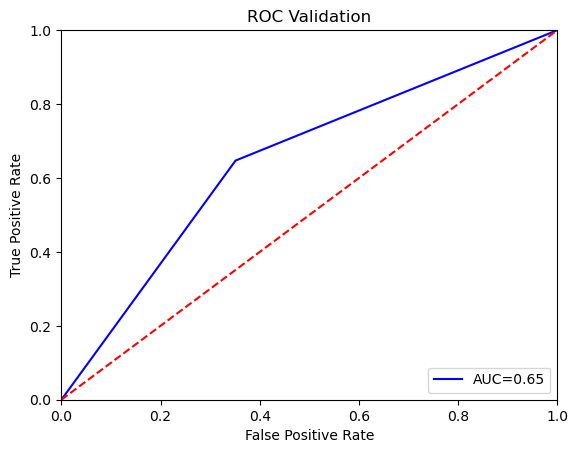

In [14]:
from sklearn import tree

clf=tree.DecisionTreeClassifier()

# change the shape of Y_train to (n_samples, ) using `.ravel()`
clf=clf.fit(X_train, Y_train.ravel())

clf_pred = clf.predict(X_test)

print('The accuracy of the Decision Tree is',metrics.accuracy_score(clf_pred, Y_test))

r=clf.score(X_test, Y_test.ravel())

fpr,tpr,_=roc_curve(Y_test,clf_pred)

roc_auc=auc(fpr,tpr)
plt.title('ROC Validation')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [15]:
NX=df[['MonthlyCharges', 'tenure','Contract']].values
Y=df[['Churn']].values

# train, test split
NX_train, NX_test, Y_train, Y_test = train_test_split(NX, Y, test_size=0.3, random_state=88, stratify=Y)

from sklearn import tree

clf1=tree.DecisionTreeClassifier()

# change the shape of Y_train to (n_samples, ) using `.ravel()`
clf1=clf1.fit(NX_train, Y_train.ravel())

clf1_pred = clf1.predict(NX_test)

print('The accuracy of the Decision Tree is',metrics.accuracy_score(clf1_pred, Y_test))

The accuracy of the Decision Tree is 0.6663594470046083


In [16]:
!pip3 install pydot

In [17]:

import graphviz
import pydot
from six import StringIO
dot_data=StringIO()
tree.export_graphviz(clf1,out_file=dot_data)
graph=pydot.graph_from_dot_data(dot_data.getvalue())

graph[0].write_pdf("Tree2.pdf")

C:\Users\xwwwa\AppData\Local\Temp\ipykernel_11224\1811515924.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color,label='Churn',cmap=plt.cm.Paired)
C:\Users\xwwwa\AppData\Local\Temp\ipykernel_11224\1811515924.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color,label='Churn',cmap=plt.cm.Paired)
C:\Users\xwwwa\AppData\Local\Temp\ipykernel_11224\1811515924.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color,label='Churn',cmap=plt.cm.Paired)


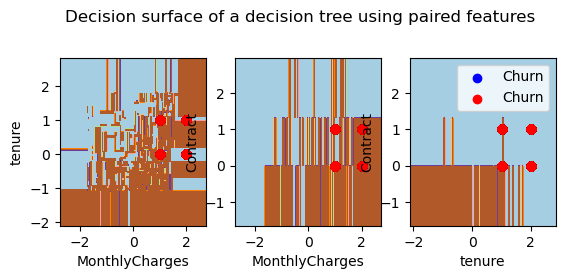

In [18]:

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
n_classes=2
plot_colors='bry'
plot_step=0.02

feature_names=['MonthlyCharges', 'tenure','Contract']
for pairidx,pair in enumerate([[0,1],[0,2],[1,2]]):
    nX = NX[:,pair]
    nY = df[['Churn']].values
    
    idx=np.arange(nX.shape[0])
    np.random.seed(19)
    np.random.shuffle(idx)
    nX=nX[idx]
    y=nY[idx]
    
    
    mean=nX.mean(axis=0)
    std=nX.std(axis=0)
    nX=(nX-mean)/std

    clf = DecisionTreeClassifier().fit(nX, y)
    plt.subplot(2, 3, pairidx +1)

    x_min, x_max = nX[:,0].min() - 1, nX[:,0].max() + 1
    y_min, y_max = nX[:,1].min() - 1, nX[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(feature_names[pair[0]])
    plt.ylabel(feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color,label='Churn',cmap=plt.cm.Paired)
    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

In [19]:
newX = df[['SeniorCitizen', 'Partner', 'Dependents']].values
Y = df[['Churn']].values

# train, test split
newX_train, newX_test, Y_train, Y_test = train_test_split(newX, Y, test_size=0.3, random_state=88, stratify=Y)

from sklearn import tree

clf2=tree.DecisionTreeClassifier()

# change the shape of Y_train to (n_samples, ) using `.ravel()`
clf2=clf2.fit(newX_train, Y_train.ravel())

clf2_pred = clf2.predict(newX_test)

print('The accuracy of the Decision Tree is',metrics.accuracy_score(clf2_pred, Y_test))

The accuracy of the Decision Tree is 0.6018433179723502


In [20]:
import graphviz
import pydot
from six import StringIO
dot_data=StringIO()
tree.export_graphviz(clf2,out_file=dot_data)
graph=pydot.graph_from_dot_data(dot_data.getvalue())

graph[0].write_pdf("Tree3.pdf")

The accuracy of the Decision Tree is 0.6018433179723502


C:\Users\xwwwa\AppData\Local\Temp\ipykernel_11224\2518560416.py:59: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color,label='Churn',cmap=plt.cm.Paired)
C:\Users\xwwwa\AppData\Local\Temp\ipykernel_11224\2518560416.py:59: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color,label='Churn',cmap=plt.cm.Paired)
C:\Users\xwwwa\AppData\Local\Temp\ipykernel_11224\2518560416.py:59: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color,label='Churn',cmap=plt.cm.Paired)


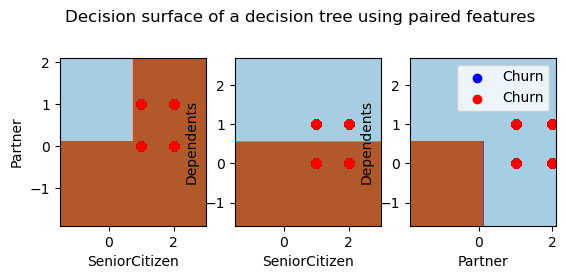

In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
n_classes=2
plot_colors='bry'
plot_step=0.02

newX = df[['SeniorCitizen', 'Partner', 'Dependents']].values
Y = df[['Churn']].values

# train, test split
newX_train, newX_test, Y_train, Y_test = train_test_split(newX, Y, test_size=0.3, random_state=88, stratify=Y)

from sklearn import tree

clf=tree.DecisionTreeClassifier()

# change the shape of Y_train to (n_samples, ) using `.ravel()`
clf=clf.fit(newX_train, Y_train.ravel())

clf_pred = clf.predict(newX_test)

print('The accuracy of the Decision Tree is',metrics.accuracy_score(clf_pred, Y_test))

feature_names=['SeniorCitizen', 'Partner', 'Dependents']
for pairidx,pair in enumerate([[0,1],[0,2],[1,2]]):
    nX = newX[:,pair]
    nY = df[['Churn']].values
    
    idx=np.arange(nX.shape[0])
    np.random.seed(19)
    np.random.shuffle(idx)
    nX=nX[idx]
    y=nY[idx]
    
    
    mean=nX.mean(axis=0)
    std=nX.std(axis=0)
    nX=(nX-mean)/std

    clf = DecisionTreeClassifier().fit(nX, y)
    plt.subplot(2, 3, pairidx +1)

    x_min, x_max = nX[:,0].min() - 1, nX[:,0].max() + 1
    y_min, y_max = nX[:,1].min() - 1, nX[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(feature_names[pair[0]])
    plt.ylabel(feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color,label='Churn',cmap=plt.cm.Paired)
    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

The accuracy of the Random Forest is 0.7354838709677419


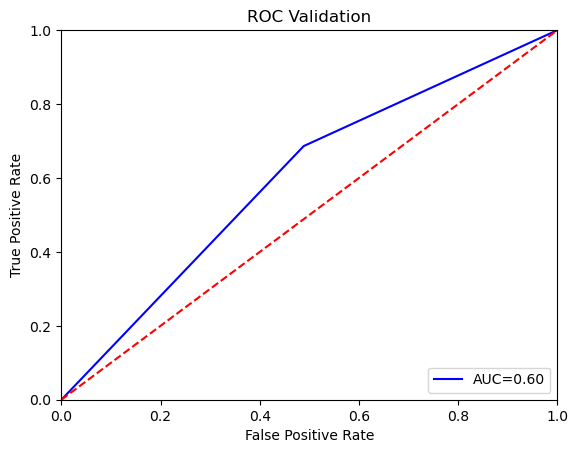

In [22]:

from sklearn.ensemble import RandomForestClassifier
X = df[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']].values
Y = df[['Churn']].values

# train, test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=88, stratify=Y)
clf3=RandomForestClassifier(n_estimators=10,criterion='gini',max_depth=2,random_state=0)
clf3.fit(X_train,Y_train.ravel())
clf3_pred = clf3.predict(X_test)

print('The accuracy of the Random Forest is',metrics.accuracy_score(clf3_pred, Y_test))

r=clf3.score(X_test, Y_test.ravel())

fpr,tpr,_=roc_curve(Y_test,clf_pred)

roc_auc=auc(fpr,tpr)
plt.title('ROC Validation')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()